<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(w2v).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
df = pd.read_csv(url0)

In [3]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: emosi, dtype: int64

In [ ]:
# df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

In [6]:
df3 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower.txt', delimiter = "\t")
df3.columns = ["arti"]

preputama : lower case

In [7]:
def lower(temp):
  return temp.str.lower()

In [8]:
df['dokumen']=lower(df['dokumen'])

In [9]:
df2['tweet']=lower(df2['tweet'])

In [10]:
df3['arti']=lower(df3['arti'])

preputama : Pembersihan noise (over enter and space)

In [11]:
def bersih_noise(temp):
  temp=temp.replace(' \n', ' ', regex=True)
  temp=temp.replace('   ', ' ', regex=True)
  return temp.replace('  ', ' ', regex=True)

In [12]:
df=bersih_noise(df)

In [13]:
df2=bersih_noise(df2)

In [14]:
df3=bersih_noise(df3)

preptambah : expand contractions

In [15]:
!pip install contractions
import contractions

     |████████████████████████████████| 284 kB 12.3 MB/s 
     |████████████████████████████████| 321 kB 65.6 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85448 sha256=b91444a61a0261f7de2e69be531f10179f17c79936f468325bd897d9ea7f0cbc
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [16]:
def expand_word(temp):
  expanded_words = []   
  for word in temp:
    expanded_words.append(contractions.fix(word))
  return expanded_words

In [17]:
df.dokumen=expand_word(df.dokumen)

In [18]:
df2.tweet=expand_word(df2.tweet)

In [19]:
df3.arti=expand_word(df3.arti)

preputama : cleansing punctuation

In [20]:
def clns_punc(temp):
  return temp.str.replace(r'[^\w\s]+', '')

In [21]:
df['dokumen'] = clns_punc(df['dokumen'])

In [22]:
df2['tweet'] = clns_punc(df2['tweet'])

In [23]:
df3['arti'] = clns_punc(df3['arti'])

preputama : cleansing number

In [24]:
!pip install tweet-preprocessor
import preprocessor as p

In [25]:
p.set_options(p.OPT.NUMBER)
def clns_numb(temp):
  sementara=[]
  for word in temp:
    sementara.append(p.clean(word))
  return sementara

In [26]:
df.dokumen=clns_numb(df.dokumen)

In [27]:
df2.tweet=clns_numb(df2.tweet)

In [28]:
df3.arti=clns_numb(df3.arti)

preptambah : remove stopword

In [29]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
def remove_stopw(temp):
  temp=temp.str.replace(pat, '')
  return temp.str.replace(r'\s+', ' ')

In [31]:
df['dokumen'] = remove_stopw(df['dokumen'])

In [32]:
df2['tweet'] = remove_stopw(df2['tweet'])

In [33]:
df3['arti'] = remove_stopw(df3['arti'])

tokenizing

In [34]:
def token(temp):
  return [word_tokenize(x) for x in temp]

In [35]:
df.dokumen=token(df.dokumen)

In [36]:
df2.tweet=token(df2.tweet)

In [37]:
df3.arti=token(df3.arti)

preptambah : Lemmatization

In [38]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [39]:
def lemma(temp):
  temp.apply(lambda x: [stemmer.stem(y) for y in x])

In [40]:
lemma(df['dokumen'])

In [41]:
lemma(df2['tweet'])

In [42]:
lemma(df3['arti'])

save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [ ]:
# sent=df.dokumen

In [ ]:
# sent=df2.tweet.append(df.dokumen,ignore_index=True)

In [ ]:
# sent=df3.arti.append(df.dokumen,ignore_index=True)

In [43]:
sent=df3.arti.append(df2.tweet.append(df.dokumen,ignore_index=True),ignore_index=True)

word2ec

In [44]:
from gensim.models import Word2Vec

In [45]:
w2v = Word2Vec(sent, window=5, min_count=1, workers=12, sg=1, iter=1)

In [ ]:
# (sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, 
#  seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=5, 
#  null_word=0, trim_rule=None, sorted_vocab=1, batch_words=MAX_WORDS_IN_BATCH, compute_loss=False, callbacks=(), max_final_vocab=None)

cek model

In [46]:
w2v.wv.vectors.shape

(1003499, 100)

In [47]:
w2v.wv["moment"]

array([ 0.20104533, -0.106058  ,  0.03993781, -0.63086456, -0.21551383,
        0.4383552 , -0.32692015, -0.10958238, -0.52994114,  0.05830808,
       -0.14160559, -0.46857592, -0.27791524, -0.20886618, -0.4062259 ,
        0.09540027, -0.01519168, -0.49975407,  0.13756722, -0.02693422,
        0.05762672, -0.06625398, -0.04000199, -0.4665833 ,  0.17841063,
       -0.14992045,  0.00554046, -0.1611118 , -0.20524682, -0.01496743,
       -0.21616004, -0.3293888 ,  0.07053998,  0.22993504,  0.04506839,
        0.33063254,  0.3726098 ,  0.15696134, -0.37126756,  0.05406183,
       -0.40785712, -0.3463758 ,  0.22762506,  0.14653778, -0.07005591,
       -0.31807283,  0.09341993,  0.2048683 ,  0.12526318, -0.3383212 ,
        0.11774541,  0.01365409, -0.08528376, -0.43693826,  0.05533092,
        0.23966835, -0.824605  ,  0.12399999,  0.5681173 ,  0.26542225,
       -0.26224387,  0.00470713,  0.33477488,  0.05983683,  0.08051717,
       -0.08095037, -0.2082163 , -0.3992868 ,  0.29562992, -0.46

ekstraksi fitur

In [48]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,w2v.wv[word])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [49]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


klasifikasi svm

In [50]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

conf matrix dan akurasi

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#  class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
# cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, 
# pre_dispatch='2*n_jobs', method='predict')

In [52]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

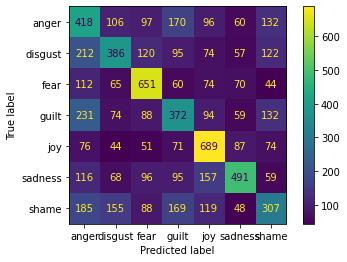

0.44092602448110696
(0.4416092909862015, 0.44002728633656313, 0.43759741538059405, None)


In [53]:
klasifikasi('poly')

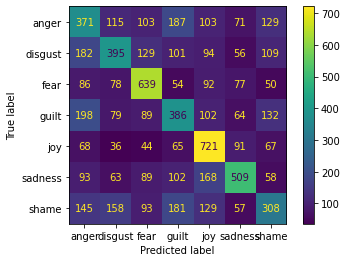

0.4429217668972858
(0.4389506783089369, 0.4420184918456556, 0.43756981391533095, None)


In [54]:
klasifikasi('rbf')

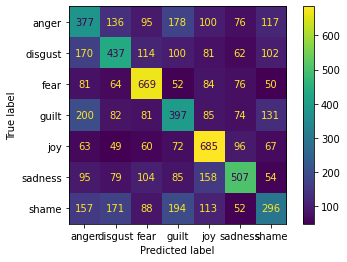

0.4481106971793507
(0.4434666644348053, 0.4473467228305852, 0.4432136328085829, None)


In [55]:
klasifikasi('linear')